<a href="https://colab.research.google.com/github/ayushman1024/Machine-Learning-Deep-Learning-Algorithms/blob/master/Regression%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


In [2]:
# define regression model
#!pip install livelossplot
from livelossplot import PlotLossesKeras

In [0]:
# Concrete data from github remote repo
datapath = "https://raw.githubusercontent.com/ayushman1024/Machine-Learning-Deep-Learning-Algorithms/master/DATA/concrete_data.csv"

In [0]:
data = pd.read_csv(datapath)

In [5]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.shape

(1030, 9)

In [7]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# **Cleaning the Dataset**

###Checking if any null values in data

In [8]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

There is no **NULL** values present in dataset

###Creating Predictors and Target data from dataset

In [0]:
columns = data.columns
predictors = data[columns[columns != 'Strength']]
target = data['Strength']

# ***Normalizing Predictors***
**Normalizing** the predictors to make values comparable.

In [11]:
predictors = ( predictors - predictors.mean() ) / predictors.std()
predictors.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340


###Analyzing the Predictors

In [12]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [13]:
n = predictors.shape[1]
print("We have",n,"predictors")

We have 8 predictors


###Spliting Data into Train/Test
Spliting data randomly with ***30%*** data for testing using sklearn

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

### Preparing Neural Network

Network with 1 Hidden layer wih 10 nodes having RELU Activation function

**3 hidden layer with 50 epochs(part-b)**

In [0]:
# Importing Sequential Model and Dense layer from keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Model

In [0]:
# Sequential model
model = Sequential()

#Adding 1st Hidden layer with 10 nodes, Relu activation function
model.add(Dense(10, input_shape=(8,), activation='relu'))

#Adding 2nd Hidden layer with 10 nodes, Relu activation function
model.add(Dense(10, input_shape=(8,), activation='relu'))

#Adding 3rd Hidden layer with 10 nodes, Relu activation function
model.add(Dense(10, input_shape=(8,), activation='relu'))

#Output node
model.add(Dense(1))

In [0]:
# Compiling, ADAM optimizer, MSE
model.compile(optimizer='adam', loss='mean_squared_error')

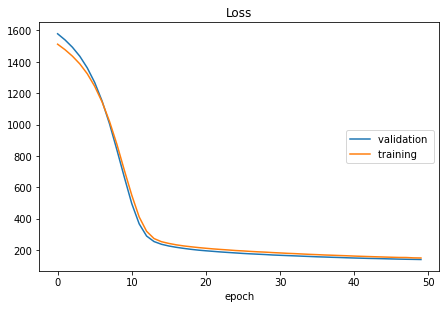

Loss
	validation       	 (min:  139.383, max: 1679.643, cur:  139.383)
	training         	 (min:  149.107, max: 1595.733, cur:  149.107)


In [34]:
# Fitting model with training dataset, 30% for validation
model.fit(xTrain, yTrain, validation_split=0.3, epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

###Evaluating our model

In [35]:
score = model.evaluate(xTest, yTest)
print("Mean squared error:  ", score)

309/309 [==============================] - 0s 38us/step
Mean squared error:   138.57321794133355


## Making 50 Iterations

Iterate 50 times of above steps to calculate 50 mean squared errors

**100 Epcohs this time on normalized data**

In [0]:
# Array of 50 mean sqaured errors
losses = []
def iterr():
  xTrain, xTest, yTrain, yTest = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
  model = Sequential()
  model.add(Dense(10, input_shape=(8,), activation='relu'))
  model.add(Dense(10, input_shape=(8,), activation='relu'))
  model.add(Dense(10, input_shape=(8,), activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(xTrain, yTrain, validation_split=0.3, epochs=50, verbose=0)

  loss = model.evaluate(xTest, yTest)
  losses.append(loss)

In [37]:
# Iterating 50 times (Train -> Evaluate) network, with normalized data
for i in range(50):
  iterr()

309/309 [==============================] - 0s 30us/step


##Calculating Mean and Standard deviation of our Mean sqaured errors

In [0]:
losses = pd.Series(losses)
loss_mean = losses.mean()
loss_std = losses.std()

In [39]:
print("Mean Loss:",loss_mean)
print("Standard deviation:",loss_std)

Mean Loss: 134.78371460751035
Standard deviation: 8.819042690385789


#Comparing results

**Part-A** Without Normalizing the predictors we got 
* **Mean Loss**: 425.37767656196667
* **Standard deviation**: 442.51910085776944

**Part-B** After Normalizing the predictors we got
* **Mean Loss**: 648.247275224704
* **Standard deviation**: 143.08653223752677

**Part-C** After Increasing the number of epochs on Normalized data, performance is increased

* **Mean Loss**: 203.16735317687
* **Standard deviation**: 41.02574295583145

**Part-D** After increasing number of Hidden layers to 3 , we reached best results so far

* **Mean Loss**: 134.78371460751035
* **Standard deviation**: 8.819042690385789




#**Answer:** After increasing number of Hidden layers to 3 (with normalized data) we reached best results so far. Lowest Average MSE is given below
* **Mean Loss**: 134.78371460751035